In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.15.0


In [0]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [0]:
train_images = train_images[:30000]
train_labels = train_labels[:30000]

train_images.shape

(30000, 28, 28)

In [0]:
len(train_labels)

15000

In [0]:
train_labels

array([9, 0, 0, ..., 7, 0, 8], dtype=uint8)

In [0]:
test_images.shape

(10000, 28, 28)

In [0]:
len(test_labels)

10000

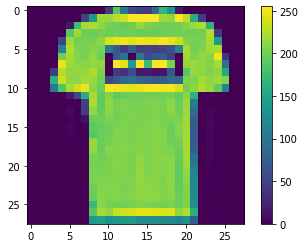

In [0]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
train_images[1]

array([[  0,   0,   0,   0,   0,   1,   0,   0,   0,   0,  41, 188, 103,
         54,  48,  43,  87, 168, 133,  16,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,   0,  49, 136, 219, 216, 228, 236,
        255, 255, 255, 255, 217, 215, 254, 231, 160,  45,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  14, 176, 222, 224, 212, 203, 198, 196,
        200, 215, 204, 202, 201, 201, 201, 209, 218, 224, 164,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 188, 219, 200, 198, 202, 198, 199, 199,
        201, 196, 198, 198, 200, 200, 200, 200, 201, 200, 225,  41,   0,
          0,   0],
       [  0,   0,   0,   0,  51, 219, 199, 203, 203, 212, 238, 248, 250,
        245, 249, 246, 247, 252, 248, 235, 207, 203, 203, 222, 140,   0,
          0,   0],
       [  0,   0,   0,   0, 116, 226, 206, 204, 207, 204, 101,  75,  47,
         73,  48,  50,  45,  51,  63, 113, 222, 202, 206, 220, 224,   0,
          0,   0],
       [  

In [0]:
train_images = train_images / 255.0

test_images = test_images / 255.0

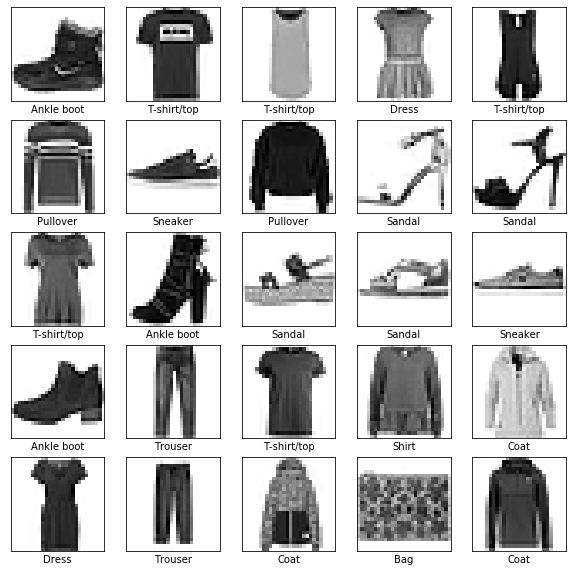

In [0]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(60, activation='tanh'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
model.fit(train_images, train_labels, epochs=10)

Train on 10000 samples
Epoch 1/10
10000/10000 [==============================] - 1s 98us/sample - loss: 0.7107 - acc: 0.7413
Epoch 2/10
10000/10000 [==============================] - 1s 67us/sample - loss: 0.4578 - acc: 0.8337
Epoch 3/10
10000/10000 [==============================] - 1s 69us/sample - loss: 0.3988 - acc: 0.8537
Epoch 4/10
10000/10000 [==============================] - 1s 75us/sample - loss: 0.3664 - acc: 0.8633
Epoch 5/10
10000/10000 [==============================] - 1s 78us/sample - loss: 0.3522 - acc: 0.8692
Epoch 6/10
10000/10000 [==============================] - 1s 69us/sample - loss: 0.3162 - acc: 0.8827
Epoch 7/10
10000/10000 [==============================] - 1s 64us/sample - loss: 0.3006 - acc: 0.8902
Epoch 8/10
10000/10000 [==============================] - 1s 64us/sample - loss: 0.2799 - acc: 0.8967
Epoch 9/10
10000/10000 [==============================] - 1s 68us/sample - loss: 0.2741 - acc: 0.8995
Epoch 10/10
10000/10000 [==============================] - 

In [0]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/10000 - 0s - loss: 0.4545 - acc: 0.8456

Test accuracy: 0.8456


In [0]:
predictions = model.predict(test_images)

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

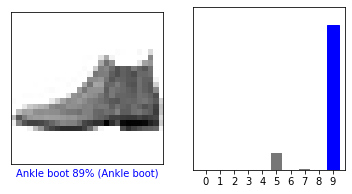

In [0]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

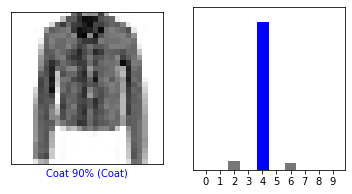

In [0]:
i = 10
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

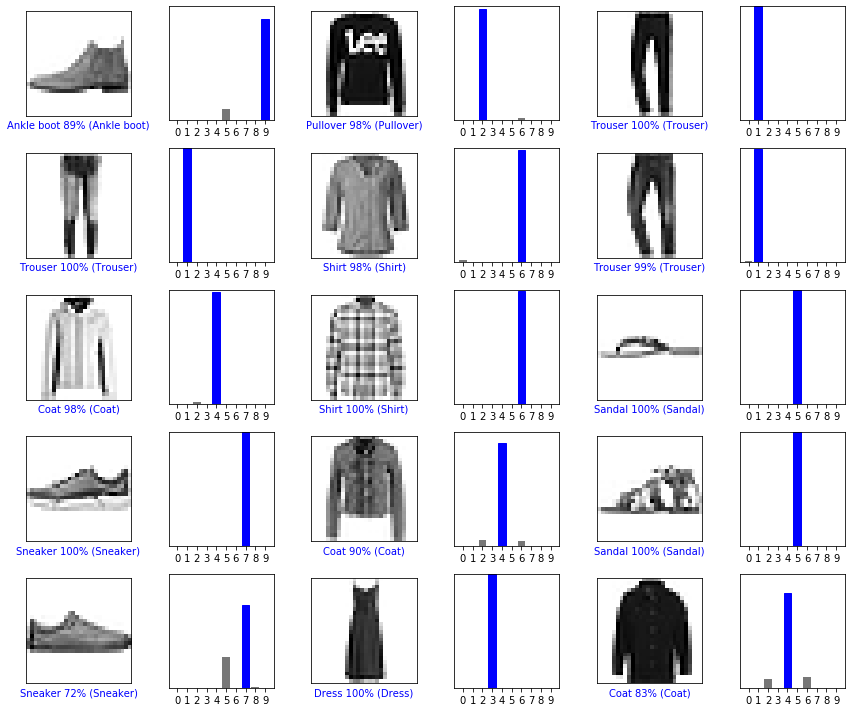

In [0]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [0]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [0]:
test_images.shape

(10000, 28, 28)

In [0]:
train_images.shape

(30000, 28, 28)

In [0]:
nsamples, nx, ny = train_images.shape
train_images2d = train_images.reshape((nsamples,nx*ny))

In [0]:
#All Classifiers

from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(random_state=5)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()

from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(random_state=5, max_iter = 5000)

Classifier_list = [mnb, sgd, knn, forest]
Classifier_list_names = ['MultinomialNB', 'SGD', 'KNN', 'RandomForest']

from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from mpl_toolkits.axes_grid1 import make_axes_locatable

from sklearn.metrics import classification_report



In [0]:
Classifier_list = [mnb, sgd, knn, forest]
Classifier_list_names = ['MultinomialNB', 'SGD', 'KNN', 'RandomForest']
import pandas as pd
def model_accuracy(X, y):
  accuracy_list = []
  dic = {}
  for i in range(len(Classifier_list)):
    accuracy_list.append(cross_val_score(Classifier_list[i], X, y, cv = 3, scoring="accuracy").mean())
    dic[Classifier_list_names[i]] = accuracy_list[i]

    target_names = ["Class {}".format(i) for i in range(num_classes)]
    print(classification_report(y_true, predicted_classes, target_names=target_names))
  print(dic)



In [0]:
model_accuracy(train_images2d, train_labels)

{'MultinomialNB': 0.6634324508692522, 'SGD': 0.8000669674444881, 'KNN': 0.8358333256356811, 'RandomForest': 0.8455003028760942}


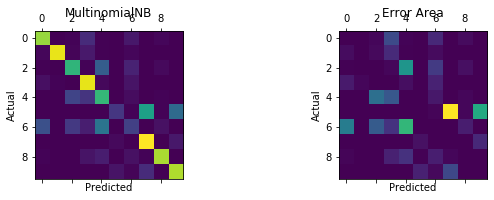

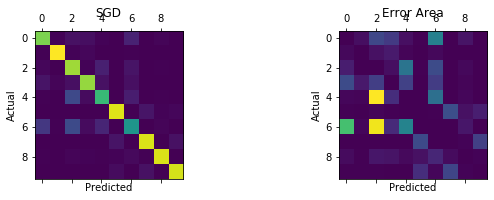

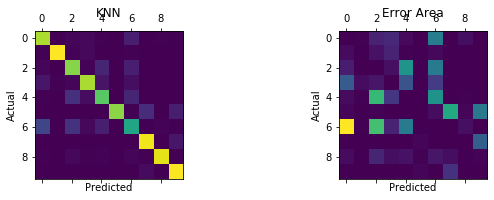

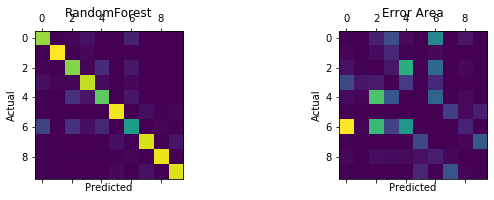

In [0]:
for i in range(len(Classifier_list)):
  train_lables_pred = cross_val_predict(Classifier_list[i], train_images2d, train_labels, cv = 3)
  conf_mx = confusion_matrix(train_labels, train_lables_pred)
  row_sum= conf_mx.sum(axis=1, keepdims=True)
  norm_conf_mx = conf_mx / row_sum
  np.fill_diagonal(norm_conf_mx, 0)

  fig = plt.figure(figsize=(10,6)) # create a figure object
  
  sub1 = fig.add_subplot(2,2,1) # create an axes object in the figure, 2x2 grid, 1st subplot.
  sub1.set_xlabel('Predicted')
  sub1.set_ylabel('Actual')
  sub1.set_title(Classifier_list_names[i])
  sub1.matshow(conf_mx, cmap=plt.cm.viridis)


  sub2 = fig.add_subplot(2,2,2) # create an axes object in the figure, 2x2 grid, 1st subplot.
  sub2.set_xlabel('Predicted')
  sub2.set_ylabel('Actual')
  sub2.set_title("Error Area")
  sub2.matshow(norm_conf_mx, cmap=plt.cm.viridis)

  plt.show()
  

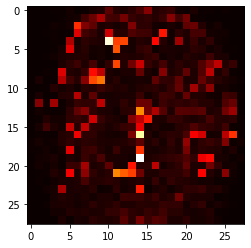

In [0]:
forest.fit(train_images2d, train_labels)
a = forest.feature_importances_
a = np.reshape(a, (28,28))

import matplotlib.pyplot as plt

plt.imshow(a, cmap='hot', interpolation='nearest')
plt.show()

In [0]:
nsamples, nx, ny = test_images.shape
test_images2d = test_images.reshape((nsamples,nx*ny))
model_accuracy(test_images2d, test_labels)

{'MultinomialNB': 0.660597723471975, 'SGD': 0.7939013864163565, 'KNN': 0.8074922227616838, 'RandomForest': 0.8128023232813651}
